# INSPIRE Collaboration Graph

Scrape publication data from INSPIRE-HEP to create a graph of collaborations using Networkx

Read about the INSPIRE API here: https://github.com/inspirehep/rest-api-doc

Author: Pablo Villanueva-Domingo

In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Author search routine
# Given a root author rootauthorid, it calls the INSPIRE API to get data about his/her publications
# Then, takes the coauthors and add them to the graph
def author_search(rootauthorid, coauthids, graph):
    
    # Search articles from the profile authorid
    authorquery = 'https://inspirehep.net/api/literature?sort=mostrecent&size=1000&q=a%20'+rootauthorid
    page = requests.get(authorquery)

    # Take the publications
    try:
        data = page.json()["hits"]["hits"]
    except:
        print("Problem reading json data")
        return coauthids, graph

    # For each publication, get the coauthors
    for pub in data:

        authors = pub["metadata"]["authors"]
        for authdict in authors:
            
            try:
                inspireid = authdict["ids"][0]["value"]
                full_name = authdict["full_name"]
            except:
                print("Profile without ids")
                pass

            # Add to the list if the author is not in the graph yet
            if (inspireid in coauthids)==False:
                print(inspireid, full_name)
                
                # Add to the graph as a node, with its correspondent edge to the root author
                graph.add_node(inspireid)
                graph.add_edge(rootauthorid, inspireid)

                coauthids.append(inspireid)
                
            # In case the author is already in the list (found as coauthor of another researcher), add an edge from the current root author
            else:
                graph.add_edge(rootauthorid, inspireid)
            
    return coauthids, graph

In [3]:
# Given an initial list of authors, create a graph with their coauthors
# Alternatively, one can also start with only one author, and the routine iterates over his/her coauthors over n_auths
def create_coll_graph(ini_coauths, n_auths=None):
    
    coauthids = ini_coauths.copy()
    if n_auths==None:
        n_auths = len(ini_coauths)

    # Create an empty graph
    graph = nx.Graph()

    # Start loop over authors
    count = 0    
    for auth in coauthids:
        print(count,auth)
        coauthids, graph = author_search(auth, coauthids, graph)
        count+=1
        if count==n_auths:
            break

    # Create a subgraph including only the initial authors
    inigraph = graph.subgraph(ini_coauths)
    print("Number of nodes:", graph.number_of_nodes(), "Number of edges:",  graph.number_of_edges())
    return graph, inigraph

In [4]:
# Create a initial list of authors
ini_coauths = ["P.Villanueva.Domingo.1","M.G.Folgado.1","N.Rius.1","Stefan.Sandner.1","V.Munoz.2"]

# Create their collaboration graph
graph, inigraph = create_coll_graph(ini_coauths)

0 P.Villanueva.Domingo.1
F.Villaescusa.Navarro.1 Villaescusa-Navarro, Francisco
D.AnglesAlcazar.2 Anglés-Alcázar, Daniel
Shy.Genel.1 Genel, Shy
F.Marinacci.4 Marinacci, Federico
D.N.Spergel.1 Spergel, David N.
L.E.Hernquist.1 Hernquist, Lars
M.Vogelsberger.1 Vogelsberger, Mark
R.Dave.1 Dave, Romeel
D.Narayanan.1 Narayanan, Desika
L.Thiele.1 Thiele, Leander
A.Nicola.1 Nicola, Andrina
Yin.Li.1 Li, Yin
B.D.Wandelt.1 Wandelt, Benjamin
R.S.Somerville.1 Somerville, Rachel S.
J.M.Z.Matilla.1 Matilla, Jose Manuel Zorrilla
F.G.Mohammad.1 Mohammad, Faizan G.
S.Hassan.1 Hassan, Sultan
H.Shao.1 Shao, Helen
D.Wadekar.1 Wadekar, Digvijay
M.Eickenberg.1 Eickenberg, Michael
K.W.K.Wong.1 Wong, Kaze W.K.
G.Contardo.1 Contardo, Gabriella
Y.Jo.2 Jo, Yongseok
E.Moser.1 Moser, Emily
E.T.Lau.1 Lau, Erwin T.
L.F.M.P.Valle.1 Valle, Luis Fernando Machado Poletti
Alejandro.Perez.2 Perez, Lucia A.
D.Nagai.1 Nagai, Daisuke
N.Battaglia.5 Battaglia, Nicholas
K.Ichiki.2 Ichiki, Kiyotomo
O.Mena.1 Mena, Olga
S.Palomare

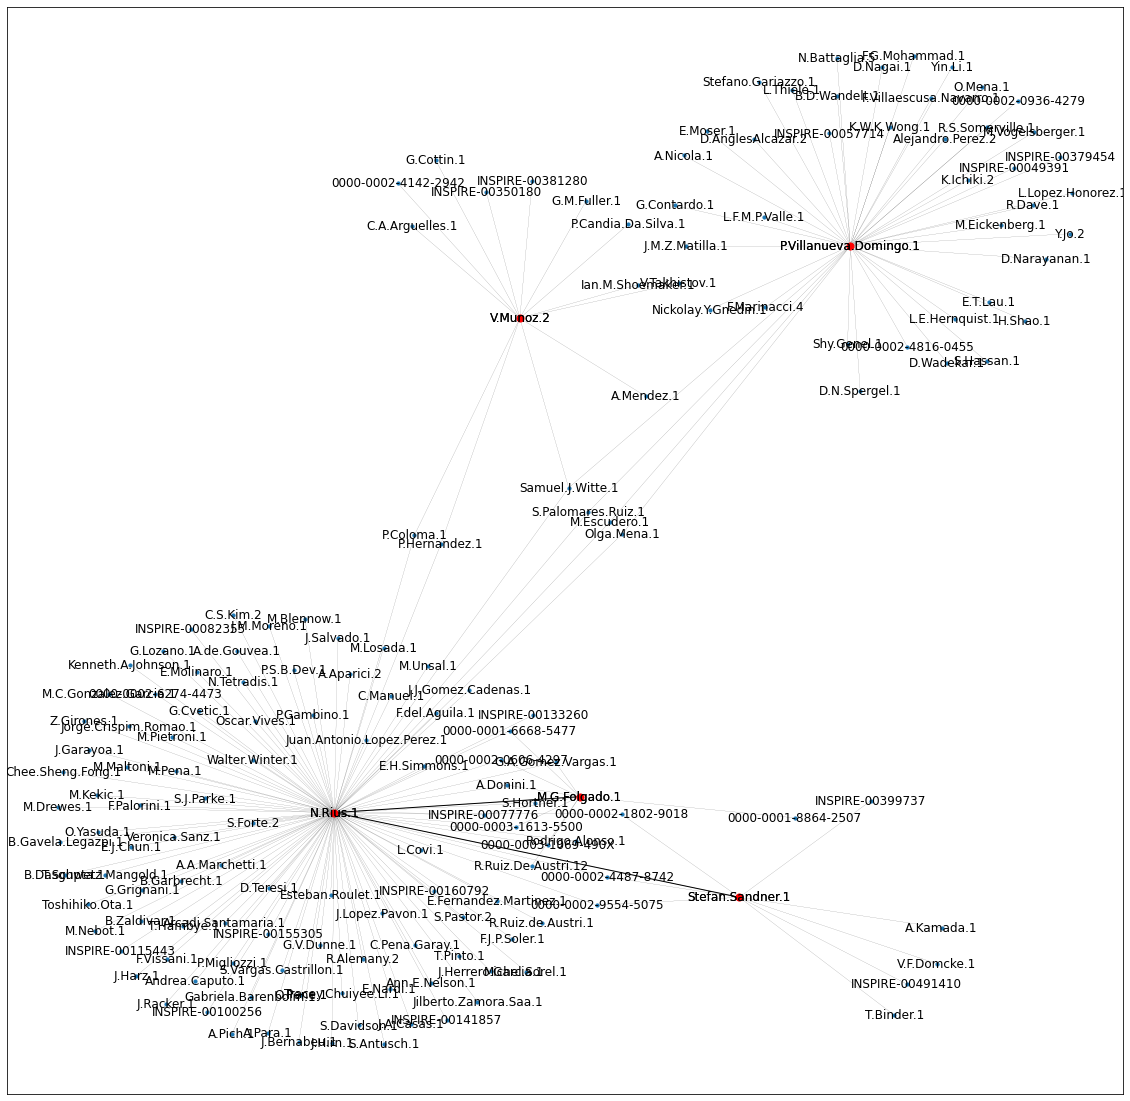

In [5]:
# Plot the graph
def plot_graph(namegraph, graph, inigraph=None, k=None):
    fig, ax = plt.subplots(figsize=(20,20))

    pos = nx.spring_layout(graph, k=k, iterations=20)
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_size=10, width=0.1)
    if inigraph!=None:
        nx.draw_networkx(inigraph, pos=pos, node_size=50, node_color="red")#, edge_color="red")

    fig.savefig("inspiregraph_"+namegraph+".pdf")
    plt.show()
    plt.close(fig)
    
plot_graph("MyGraph", graph, inigraph, k=0.1)

0 P.Villanueva.Domingo.1
F.Villaescusa.Navarro.1 Villaescusa-Navarro, Francisco
D.AnglesAlcazar.2 Anglés-Alcázar, Daniel
Shy.Genel.1 Genel, Shy
F.Marinacci.4 Marinacci, Federico
D.N.Spergel.1 Spergel, David N.
L.E.Hernquist.1 Hernquist, Lars
M.Vogelsberger.1 Vogelsberger, Mark
R.Dave.1 Dave, Romeel
D.Narayanan.1 Narayanan, Desika
L.Thiele.1 Thiele, Leander
A.Nicola.1 Nicola, Andrina
Yin.Li.1 Li, Yin
B.D.Wandelt.1 Wandelt, Benjamin
R.S.Somerville.1 Somerville, Rachel S.
J.M.Z.Matilla.1 Matilla, Jose Manuel Zorrilla
F.G.Mohammad.1 Mohammad, Faizan G.
S.Hassan.1 Hassan, Sultan
H.Shao.1 Shao, Helen
D.Wadekar.1 Wadekar, Digvijay
M.Eickenberg.1 Eickenberg, Michael
K.W.K.Wong.1 Wong, Kaze W.K.
G.Contardo.1 Contardo, Gabriella
Y.Jo.2 Jo, Yongseok
E.Moser.1 Moser, Emily
E.T.Lau.1 Lau, Erwin T.
L.F.M.P.Valle.1 Valle, Luis Fernando Machado Poletti
Alejandro.Perez.2 Perez, Lucia A.
D.Nagai.1 Nagai, Daisuke
N.Battaglia.5 Battaglia, Nicholas
K.Ichiki.2 Ichiki, Kiyotomo
O.Mena.1 Mena, Olga
S.Palomare

Celio.Adrega.Moura.1 Moura, C.A.
J.Mousseau.1 Mousseau, J.
G.Mouster.2 Mouster, G.
Wei.Mu.1 Mu, W.
L.M.Mualem.1 Mualem, L.
J.Mueller.7 Mueller, J.
M.Muether.1 Muether, M.
S.L.Mufson.1 Mufson, S.
F.Muheim.1 Muheim, F.
A.Muir.2 Muir, A.
M.J.Mulhearn.1 Mulhearn, M.
D.Munford.2 Munford, D.
H.Muramatsu.1 Muramatsu, H.
S.Murphy.1 Murphy, S.
J.A.Musser.1 Musser, J.
J.M.Nachtman.1 Nachtman, J.
S.Nagu.1 Nagu, S.
M.Nalbandyan.2 Nalbandyan, M.
R.Nandakumar.1 Nandakumar, R.
D.Naples.1 Naples, D.
S.Narita.1 Narita, S.
A.Nath.1 Nath, A.
A.Navrer.Agasson.7 Navrer-Agasson, A.
N.Nayak.2 Nayak, N.
M.Nebot.Guinot.1 Nebot-Guinot, M.
K.Negishi.2 Negishi, K.
J.K.Nelson.1 Nelson, J.K.
J.Nesbit.2 Nesbit, J.
M.Nessi.1 Nessi, M.
D.M.Newbold.1 Newbold, D.
Mitchell.Newcomer.1 Newcomer, M.
D.Newhart.1 Newhart, D.
H.Newton.2 Newton, H.
R.Nichol.4 Nichol, R.
F.NicolasArnaldos.2 Nicolas-Arnaldos, F.
E.Niner.1 Niner, E.
K.Nishimura.1 Nishimura, K.
A.Norman.1 Norman, A.
A.Norrick.1 Norrick, A.
R.Northrop.2 Northrop, R.

K.Skarpaas.2 Skarpaas, K.
T.S.Smith.1 Smith, A.
Erica.Smith.1 Smith, E.
P.T.Smith.1 Smith, P.
M.Spanu.3 Spanu, M.
R.J.Staley.1 Staley, R.
R.J.Stanley.1 Stanley, R.
H.M.Steiner.3 Steiner, H.M.
S.I.Striganov.1 Striganov, S.
E.Tatar.2 Tatar, E.
Jacob.Todd.1 Todd, J.
M.Torti.3 Torti, M.
E.Valencia.3 Valencia, E.
S.Ventura.5 Ventura, S.
Y.Wang.97 Wang, Y.
Han.Yu.Wei.1 Wei, H.
A.Weinstein.3 Weinstein, A.
C.Wilkinson.2 Wilkinson, C.
R.J.Wilson.1 Wilson, R.J.
Kevin.Wood.1 Wood, K.
Wan.Wei.Wu.1 Wu, W.
Ying.Xiao.1 Xiao, Y.
Guang.Yang.1 Yang, G.
S.Yang.39 Yang, S.
T.Yang.18 Yang, T.
B.Yu.13 Yu, B.
H.Yu.19 Yu, H.
Jianglei.Yu.1 Yu, J.
W.Yuan.4 Yuan, W.
Meng.Zhao.1 Zhao, M.
Guanying.Zhu.1 Zhu, G.
Perri.Zilberman.1 Zilberman, P.
M.Zito.1 Zito, M.
Profile without ids
J.M.Anderson.2 Anderson, J.
Fatih.Bay.1 Bay, F.
J.Berger.6 Berger, J.
C.Bourgeois.7 Bourgeois, C.
C.Brizzolari.7 Brizzolari, C.
Gianfranco.Brunetti.1 Brunetti, G.
J.Calcutt.5 Calcutt, J.
M.Calin.7 Calin, M.
M.F.Carneiro.3 Carneiro, M.F.
T

INSPIRE-00475977 Huang, Junting
INSPIRE-00494526 Huang, Junying
INSPIRE-00204919 Hugon, Justin
INSPIRE-00314080 Iles, Gregory
INSPIRE-00236423 Ilic, Nikolina
0000-0002-9648-3451 Iliescu, Antoniu
INSPIRE-00052545 Illingworth, Robert
INSPIRE-00238283 Ioannisian, Ara
INSPIRE-00241850 Isenhower, Larry
INSPIRE-00724857 Itay, Ran
INSPIRE-00475522 Izmaylov, Alexander
INSPIRE-00693301 Jackson, Saskia
INSPIRE-00093006 Jain, Vivek
INSPIRE-00093057 James, Eric
INSPIRE-00690314 Jargowsky, Benjamin
INSPIRE-00475988 Jediny, Filip
INSPIRE-00660496 Jena, Deepika
INSPIRE-00328340 Jeong, Yu Seon
0000-0002-0154-2456 Jesús-Valls, César
INSPIRE-00448049 Ji, Xiangpan
INSPIRE-00494077 Jiang, Libo
INSPIRE-00527828 Jiménez, Sergio
INSPIRE-00670203 Jipa, Alexandru
INSPIRE-00093660 Johnson, Randy
INSPIRE-00264530 Jones, Benjamin
INSPIRE-00715953 Jones, Sebastian
INSPIRE-00743296 Judah, Matthew
INSPIRE-00094087 Jung, Chang Kee
INSPIRE-00094115 Junk, Thomas
INSPIRE-00735313 Jwa, Yeon-jae
INSPIRE-00509552 Kabirnezh

L.O.Arnold.1 Arnold, L.O.
V.Aushev.4 Aushev, V.
D.Autiero.9 Autiero, D.
H.Back.2 Back, H.
J.J.Back.3 Back, J.J.
L.Bagby.4 Bagby, L.
R.Bajou.1 Bajou, R.
S.Balasubramanian.1 Balasubramanian, S.
F.Barao.4 Barao, F.
G.J.Barker.5 Barker, G.J.
C.Barnes.4 Barnes, C.
G.Barr.1 Barr, G.
J.Barranco.Monarca.6 Barranco Monarca, J.
N.Barros.1 Barros, N.
Frederik.Bay.1 Bay, F.
J.L.Bazo.Alba.8 Bazo Alba, J.L.
L.Bellantoni.2 Bellantoni, L.
V.Bellini.4 Bellini, V.
F.Bento.Neves.4 Bento Neves, F.
J.Berger.69 Berger, J.
P.Bernardini.2 Bernardini, P.
S.Bertolucci.2 Bertolucci, S.
Y.Bezawada.1 Bezawada, Y.
M.Bhattacharjee.4 Bhattacharjee, M.
B.Bhuyan.6 Bhuyan, B.
J.Bian.2 Bian, J.
M.Biassoni.2 Biassoni, M.
B.Bilki.3 Bilki, B.
A.Blake.2 Blake, A.
B.Blanco.Siffert.3 Blanco Siffert, B.
F.D.M.Blaszczyk.1 Blaszczyk, F.D.M.
G.C.Blazey.1 Blazey, G.C.
E.Blucher.3 Blucher, E.
J.Boissevain.1 Boissevain, J.
S.Bolognesi.8 Bolognesi, S.
M.Bonesini.5 Bonesini, M.
F.Bonini.1 Bonini, F.
C.Booth.3 Booth, C.
A.Borkum.1 Borku

INSPIRE-00697909 Bostan, N.
INSPIRE-00704497 Brizzolari, C.
INSPIRE-00304227 Camilleri, L.
INSPIRE-00685191 Chang, C.
INSPIRE-00287571 Chaves, J.
INSPIRE-00734464 Cotte, P.
INSPIRE-00738341 De Vries, J.J.
INSPIRE-00308516 Dias, M.
INSPIRE-00297356 Escudero Sanchez, L.
INSPIRE-00742899 Filkins, A.
INSPIRE-00265508 Gramellini, E.
INSPIRE-00746455 Green, S.
INSPIRE-00787925 Greenwood, M.
INSPIRE-00269616 Hackenburg, A.
INSPIRE-00443775 Haigh, J.
INSPIRE-00088612 Harder, K.
INSPIRE-00494490 Hesam, A.S.
INSPIRE-00353019 Joglekar, A.
INSPIRE-00735478 Johnson, C.
INSPIRE-00100450 LeBrun, P.
INSPIRE-00219067 Leyton, M.
Yun.Xuan.Li.1 Li, Y.
INSPIRE-00788071 Liu, J.
INSPIRE-00704535 Luo, X.
INSPIRE-00686238 Mellinato, M.
INSPIRE-00529732 Morgan, B.
INSPIRE-00704553 Navas-Nicolás, D.
INSPIRE-00529374 Necib, L.
INSPIRE-00719759 Park, J.C.
INSPIRE-00686832 Penichot, Y.
INSPIRE-00714789 Pillow, J.
INSPIRE-00646735 Pinzino, J.
INSPIRE-00670000 Prior, G.
INSPIRE-00788214 Qi, K.
INSPIRE-00526847 Raboan

H.Ramirez.1 Ramírez, Héctor
S.Passaglia.1 Passaglia, Samuel
H.Motohashi.1 Motohashi, Hayato
Wayne.Hu.1 Hu, Wayne
S.Dhawan.2 Dhawan, Suhail
M.Gerbino.1 Gerbino, Martina
K.Freese.1 Freese, Katherine
A.Goobar.1 Goobar, Ariel
M.Archidiacono.1 Archidiacono, M.
M.Adamowski.1 Adamowski, M.
C.J.Adams.1 Adams, C.
D.Adams.59 Adams, D.L.
P.Adamson.1 Adamson, P.
C.H.Albright.1 Albright, C.H.
J.E.Anderson.2 Anderson, J.
K.J.Anderson.1 Anderson, K.
R.A.Andrews.1 Andrews, R.A.
J.Anthony.1 Anthony, J.
Tomoko.Ariga.1 Ariga, T.
E.Arrieta.Diaz.2 Arrieta Diaz, E.
M.V.Ascencio.Sosa.1 Ascencio, M.
D.M.Asner.1 Asner, D.M.
M.Sajjad.Athar.1 Athar, M.S.
Martin.Auger.1 Auger, M.
D.Autiero.3 Autiero, D.
J.Back.2 Back, J.J.
H.O.Back.4 Back, H.O.
X.X.Bai.1 Bai, X.
M.Baird.1 Baird, M.
A.B.Balantekin.1 Balantekin, A.B.
P.Ballett.1 Ballett, P.
H.R.Band.2 Band, H.
M.Bansal.3 Bansal, M.
S.Bansal.3 Bansal, S.
G.J.Barker.2 Barker, G.J.
J.Barranco.Monarca.2 Barranco Monarca, J.
Matthew.Bass.1 Bass, M.
B.R.Behera.1 Behera, 

S.Loucatos.1 Loucatos, S.
E.Maccioni.1 Maccioni, E.
K.Mannheim.2 Mannheim, K.
A.Margiotta.1 Margiotta, A.
Agostino.Marinelli.1 Marinelli, A.
O.Maris.2 Maris, O.
C.Markou.1 Markou, C.
J.A.Martinez.Mora.1 Martinez-Mora, J.A.
A.Martini.2 Martini, A.
R.Mele.1 Mele, R.
K.W.Melis.1 Melis, K.W.
T.Michael.3 Michael, T.
E.Migneco.1 Migneco, E.
P.Mijakowski.1 Mijakowski, P.
Andrea.Miraglia.1 Miraglia, A.
C.Maximiliano.Mollo.1 Mollo, C.M.
M.Mongelli.1 Mongelli, M.
M.Morganti.1 Morganti, M.
A.Moussa.1 Moussa, A.
P.Musico.1 Musico, P.
M.Musumeci.1 Musumeci, M.
S.Navas.2 Navas, S.
C.A.Nicolau.1 Nicolau, C.A.
I.Olcina.1 Olcina, I.
C.Olivetto.1 Olivetto, C.
A.Orlando.2 Orlando, A.
A.Papaikonomou.1 Papaikonomou, A.
G.E.Pavalas.3 Pavalas, G.E.
H.Z.Peek.1 Peek, H.
C.Pellegrino.1 Pellegrino, C.
C.Perrina.1 Perrina, C.
M.Pfutzner.1 Pfutzner, M.
P.Piattelli.1 Piattelli, P.
K.Pikounis.1 Pikounis, K.
G.E.Poma.1 Poma, G.E.
V.Popa.1 Popa, V.
T.Pradier.1 Pradier, T.
F.Pratolongo.1 Pratolongo, F.
P.4 Puhlhofer, G

I.Perez.Fournon.1 Perez-Fournon, Ismael
I.Perez.Rafols.2 Perez-Rafols, Ignasi
R.Pfaffenberger.1 Pfaffenberger, Robert
Janine.Pforr.1 Pforr, Janine
M.M.Pieri.1 Pieri, Matthew M.
J.J.Raddick.1 Raddick, M.Jordan
R.Rebolo.1 Rebolo, Rafael
J.Rich.3 Rich, James
G.T.Richards.1 Richards, Gordon T.
C.M.Rockosi.1 Rockosi, Constance M.
Graziano.Rossi.1 Rossi, Graziano
J.A.Rubino.Martin.1 Rubino-Martin, J.A.
C.Sayres.1 Sayres, Conor
Sarah.J.Schmidt.1 Schmidt, Sarah J.
A.Shelden.1 Shelden, Alaina
E.Sheldon.1 Sheldon, Erin
Yue.Shen.1 Shen, Yue
Y.Shu.2 Shu, Yiping
A.Slosar.1 Slosar, Anze
S.Smee.1 Smee, Stephen A.
S.A.Snedden.1 Snedden, Stephanie A.
F.Stauffer.1 Stauffer, Fritz
O.Steele.1 Steele, Oliver
N.Suzuki.2 Suzuki, Nao
T.Tal.2 Tal, Tomer
M.Tanaka.3 Tanaka, Masayuki
C.Tremonti.1 Tremonti, Christy A.
M.Vargas.Magana.3 Vargas Magaña, M.
M.Viel.1 Viel, Matteo
M.G.Watson.1 Watson, Mike
B.J.Weiner.1 Weiner, Benjamin J.
A.A.West.1 West, Andrew A.
W.M.Wood-Vasey.1 Wood-Vasey, W.M.
I.Zehavi.1 Zehavi, Id

M.Shetrone.1 Shetrone, Matthew
J.D.Silverman.1 Silverman, John D.
J.Simmerer.1 Simmerer, Jennifer
INSPIRE-00303614 Simmons, Audrey E.
INSPIRE-00303885 Sivarani, Thirupathi
M.F.Skrutskie.1 Skrutskie, M.F.
V.V.Smith.1 Smith, Verne V.
INSPIRE-00303897 Snedden, Stephanie A.
K.G.Stassun.1 Stassun, Keivan G.
INSPIRE-00303550 Steinmetz, Matthias
M.H.Stockett.1 Stockett, Mark H.
T.Stollberg.1 Stollberg, Todd
INSPIRE-00129285 Strauss, Michael A.
INSPIRE-00303328 Tanaka, Masayuki
INSPIRE-00303101 Thakar, Aniruddha R.
B.M.Tofflemire.1 Tofflemire, Benjamin M.
INSPIRE-00303454 Tremonti, Christy A.
INSPIRE-00051382 Verde, Licia
INSPIRE-00304063 Vogt, Nicole P.
X.Wan.7 Wan, Xiaoke
Ji.Wang.1 Wang, Ji
S.D.M.White.1 White, Simon D.M.
J.C.Wilson.1 Wilson, John C.
J.Wisniewski.1 Wisniewski, John P.
INSPIRE-00137315 Yanny, Brian
N.Yasuda.1 Yasuda, Naoki
C.Yeche.1 Yeche, Christophe
INSPIRE-00055884 York, Donald G.
E.Young.1 Young, Erick
G.Zasowski.1 Zasowski, Gail
B.Zhao.1 Zhao, Bo
G.Panotopoulos.1 Panotopo

INSPIRE-00064509 Barger, V.
L.L.Everett.1 Everett, L.
W.Fetscher.1 Fetscher, W.
A.Van.Der.Schaaf.1 van der Schaaf, A.
F.Palombi.1 Palombi, F.
A.Vladikas.1 Vladikas, A.
M.Koma.2 Koma, Miho
Yoshiaki.Koma.1 Koma, Yoshiaki
P.Weisz.1 Weisz, P.
R.Aymar.1 Aymar, R.
S.Nagamiya.1 Nagamiya, S.
S.D.Holmes.1 Holmes, S.
H.J.Kluge.1 Kluge, H.J.
R.Garobe.1 Garobe, R.
W.Scandale.1 Scandale, W.
H.Haseroth.1 Haseroth, H.
Y.Blumenfeld.1 Blumenfeld, Y.
Philip.H.Butler.1 Butler, P.
A.Muller.5 Muller, A.
M.Lindroos.1 Lindroos, M.
K.Nakamura.6 Nakamura, K.
W.Gelletly.1 Gelletly, W.
F.Gulminelli.1 Gulminelli, F.
K.L.Kratz.1 Kratz, K.-L.
B.Weng.1 Weng, B.
M.N.Harakeh.1 Harakeh, M.
J.Engelen.1 Engelen, J.
INSPIRE-00069759 Buchalla, G.
INSPIRE-00146525 Ellis, John R.
A.L.Kataev.1 Kataev, A.
S.Kraml.1 Kraml, S.
M.L.Mangano.1 Mangano, M.
F.Sanchez.Nieto.1 Sanchez, F.
K.Jansen.1 Jansen, K.
L.Lellouch.1 Lellouch, L.
Kei-ichi.Nagai.1 Nagai, Kei-ichi
M.C.Diamantini.1 Diamantini, M.C.
M.Luscher.1 Luscher, Martin
A.De.R

0000-0001-6936-998X Lindert, J.
0000-0001-6895-5688 Liu, D.
0000-0001-7386-0253 Liu, J.
Y.Liu.61 Liu, Y.
0000-0002-3143-1976 Liu, Z.
0000-0003-2472-8656 Lombardo, D.
0000-0003-0985-5809 Long, A.
0000-0003-0664-1653 Long, K.
0000-0002-7570-9597 Low, I.
0000-0001-8784-561X Luisoni, G.
INSPIRE-00219535 Ma, L.L.
INSPIRE-00049087 Magnan, A.-M.
0000-0002-7578-0027 Majumder, D.
0000-0002-6265-4339 Malinauskas, A.
0000-0003-4890-0676 Maltoni, F.
0000-0002-0886-3789 Mangano, M.L.
0000-0003-2655-7643 Marchiori, G.
0000-0003-2351-0487 Marini, A.C.
0000-0002-8006-6776 Martin, A.
0000-0002-9675-7133 Marzani, S.
0000-0002-0782-0883 Massironi, A.
INSPIRE-00141530 Matchev, K.T.
0000-0003-2132-8251 Matheus, R.D.
INSPIRE-00106015 Mazumdar, K.
INSPIRE-00432475 Mazzitelli, J.
A.E.Mcdougall.1 Mcdougall, A.E.
INSPIRE-00044923 Meade, P.
0000-0002-8480-2259 Meridiani, P.
0000-0001-8532-2356 Meyer, A.B.
0000-0001-5751-8116 Michielin, E.
INSPIRE-00016638 Milenovic, P.
0000-0002-1173-0696 Milosevic, V.
0000-0001

J.Gao.10 Gao, J.
Y.Gao.8 Gao, Y.
M.V.Garzelli.2 Garzelli, M.V.
T.Gehrmann.1 Gehrmann, T.
R.Gerosa.1 Gerosa, R.
M.Ghezzi.1 Ghezzi, M.
D.Ghosh.3 Ghosh, D.
S.Gieseke.1 Gieseke, S.
D.Gillberg.1 Gillberg, D.
E.W.N.Glover.1 Glover, E.W.N.
F.Goertz.1 Goertz, F.
D.Goncalves.Netto.1 Gonçalves, D.
J.Gonzalez.Fraile.1 Gonzalez-Fraile, J.
M.Gorbahn.1 Gorbahn, M.
C.A.Gottardo.1 Gottardo, C.A.
M.Gouzevitch.1 Gouzevitch, M.
P.Govoni.1 Govoni, P.
D.E.Gray.1 Gray, D.
M.Grazzini.1 Grazzini, M.
Nicolas.Greiner.1 Greiner, N.
J.Grigo.2 Grigo, J.
A.V.Gritsan.1 Gritsan, A.V.
R.Grober.2 Gröber, R.
S.Guindon.1 Guindon, S.
H.E.Haber.1 Haber, H.E.
Cheng.Cheng.Han.1 Han, C.
Tao.Han.1 Han, T.
R.Harlander.1 Harlander, R.
M.A.Harrendorf.1 Harrendorf, M.A.
H.B.Hartanto.1 Hartanto, H.B.
G.Heinrich.1 Heinrich, G.
A.Herrero.2 Herrero, M.
Franz.Herzog.1 Herzog, F.
B.Hespel.2 Hespel, B.
V.Hirschi.1 Hirschi, V.
S.Hoeche.1 Hoeche, S.
S.Honeywell.1 Honeywell, S.
S.J.Huber.2 Huber, S.J.
C.Hugonie.1 Hugonie, C.
J.Huston.3 Hust

J.Kunkle.2 Kunkle, J.
M.Kurata.1 Kurata, M.
Ye.Li.1 Li, Y.
E.D.Lipeles.1 Lipeles, E.
R.Lipton.1 Lipton, R.
T.M.Liss.1 Liss, T.
Jenny.List.1 List, J.
T.Ma.2 Ma, T.
P.B.Mackenzie.1 Mackenzie, P.
A.Miyamoto.2 Miyamoto, A.
G.A.Moortgat.Pick.1 Moortgat-Pick, G.
Gerard.A.Mourou.1 Mourou, G.
M.Narain.1 Narain, M.
H.A.Neal.1 Neal, H.
N.Okada.2 Okada, N.
H.Okawa.1 Okawa, H.
James.D.Olsen.1 Olsen, J.
H.Ono.2 Ono, H.
P.U.E.Onyisi.1 Onyisi, P.
N.Parashar.1 Parashar, N.
V.M.Rodriguez.1 Rodriguez, V.
R.Ruiz.1 Ruiz, R.
J.Sayre.1 Sayre, J.
Q.Shafi.1 Shafi, Q.
G.Shaughnessy.1 Shaughnessy, G.
Marc.Sher.1 Sher, M.
N.Solyak.1 Solyak, N.
J.Strube.1 Strube, J.
J.Stupak.1 Stupak, J.
S.Su.5 Su, S.
T.Suehara.1 Suehara, T.
T.Tanabe.1 Tanabe, T.
T.Tajima.1 Tajima, T.
V.I.Telnov.1 Telnov, V.
S.B.Thomas.1 Thomas, S.
K.Tsumura.1 Tsumura, K.
C.S.Un.1 Un, C.
S.Wang.2 Wang, S.
S.Watanuki.1 Watanuki, S.
A.Whitbeck.1 Whitbeck, A.
K.Yagyu.1 Yagyu, K.
Wei.Ming.Yao.1 Yao, W.
H.Yokoya.2 Yokoya, H.
S.Zenz.1 Zenz, S.
Yue.Zhan

V.Fallah.Ramazani.1 Acciari, Victor A.
S.Ansoldi.1 Ansoldi, Stefano
L.A.Antonelli.1 Antonelli, Lucio Angelo
A.Arbet.Engels.1 Arbet Engels, Axel
M.Artero.2 Artero, Manuel
Katsuaki.Asano.1 Asano, Katsuaki
D.Baack.3 Baack, Dominik
A.Babic.1 Babic, Ana
A.Baquero.Larriva.2 Baquero, Andrés
U.Barres.De.Almeida.1 Barres de Almeida, Ulisses
J.A.Barrio.1 Barrio, Juan Abel
I.Batkovic.2 Batković, Ivana
J.Becerra.Gonzalez.29 Becerra Gonzalez, Josefa
W.Bednarek.1 Bednarek, Wlodek
L.Bellizzi.2 Bellizzi, Lorenzo
E.Bernardini.1 Bernardini, Elisa
M.I.Bernardos.2 Bernardos, Maria-Isabel
Alessio.Berti.1 Berti, Alessio
J.Besenrieder.4 Besenrieder, Jürgen
W.Bhattacharyya.1 Bhattacharyya, Wrijupan
C.Bigongiari.1 Bigongiari, Ciro
A.Biland.1 Biland, Adrian
O.Blanch.Bigas.1 Blanch, Oscar
H.Bokenkamp.2 Bökenkamp, Hendrik
G.Bonnoli.1 Bonnoli, Giacomo
Z.Bosnjak.4 Bosnjak, Zeljka
G.Busetto.1 Busetto, Giovanni
R.Carosi.1 Carosi, Roberto
G.Ceribella.1 Ceribella, Giovanni
M.Cerruti.20 Cerruti, Matteo
Y.T.Chai.1 Chai, 

D.Rysewyk.Cantu.2 Rysewyk Cantu, Devyn
I.Safa.1 Safa, Ibrahim
J.Saffer.1 Saffer, Julian
S.F.Sanchez.1 Sanchez Herrera, Sebastian
A.Sandrock.5 Sandrock, Alexander
J.Sandroos.5 Sandroos, Joakim
Marcos.Santander.1 Santander, Marcos
Subir.Sarkar.2 Sarkar, Subir
Sourav.Sarkar.1 Sarkar, Sourav
M.K.Scharf.2 Scharf, Maximilian Karl
M.Schaufel.3 Schaufel, Merlin
H.Schieler.1 Schieler, Harald
S.Schindler.1 Schindler, Sebastian
P.Schlunder.62 Schlunder, P.
Torsten.Schmidt.1 Schmidt, Torsten
Austin.Schneider.1 Schneider, Austin
J.Schneider.1 Schneider, Judith
F.G.Schroeder.1 Schröder, Frank G.
L.Schumacher.5 Schumacher, Lisa Johanna
G.Schwefer.1 Schwefer, Georg
S.Sclafani.1 Sclafani, Steve
D.Seckel.1 Seckel, D.
S.Seunarine.1 Seunarine, Surujhdeo
Ankur.Sharma.1 Sharma, Ankur
S.Shefali.3 Shefali, Shefali
M.Silva.Jr.1 Silva, Manuel
B.Skrzypek.1 Skrzypek, Barbara
Benjamin.R.Smithers.1 Smithers, Ben
R.Snihur.1 Snihur, Robert
J.Soedingrekso.5 Soedingrekso, Jan
D.Soldin.1 Soldin, Dennis
C.Spannfellner.1 

N.Biederbeck.2 Biederbeck, Noah
P.Bordas.1 Bordas, Pol
D.Bose.1 Bose, Debanjan
A.Bulgarelli.9 Bulgarelli, Andrea
I.Burelli.2 Burelli, Irene
M.Buscemi.1 Buscemi, Mario
M.Cardillo.3 Cardillo, Martina
A.Carosi.1 Carosi, Alessandro
F.Cassol.Brunner.1 Cassol, Franca
M.Cerruti.16 Cerruti, Matteo
Kwong.Sang.Cheng.1 Cheng, Ks
M.Chikawa.1 Chikawa, Michiyuki
L.Chytka.1 Chytka, Ladislav
H.Costantini.2 Costantini, Heide
M.Dalchenko.1 Dalchenko, Mykhailo
G.Deleglise.3 Deleglise, Guillaume
D.della.Volpe.1 Della Volpe, Domenico
L.Di.Venere.5 Di Venere, Leonardo
R.M.Dominik.2 Dominik, Rune Michael
J.Escudero.1 Escudero, Juan
L.Foffano.2 Foffano, Luca
L.Freixas.Coromina.2 Freixas Coromina, Lluis
E.Garcia.4 Garcia, Enrique
P.Grespan.2 Grespan, Pietro
S.Gunji.1 Gunji, Shuichi
J.Hackfeld.2 Hackfeld, Jonas
T.Hassan.1 Hassan, Tarek
K.Hayashi.4 Hayashi, Kohei
M.Heller.1 Heller, Matthieu
J.Herrera.Llorente.1 Herrera Llorente, Javier
K.Hirotani.4 Hirotani, Kouichi
D.Hoffmann.1 Hoffmann, Dirk
J.Houles.2 Houles,

M.Balbo.10 Balbo, Matteo
Deirdre.Horan.1 Horan, Deirdre
A.Lien.2 Lien, Amy Yarleen
M.Balokovic.4 Balokovic, Mislav
G.Madejski.1 Madejski, Grzegorz M.
M.Perri.6 Perri, Matteo
F.Verrecchia.1 Verrecchia, Francesco
C.Leto.1 Leto, Cristina
A.Lahteenmaki.1 Lähteenmäki, Anne
M.Tornikoski.1 Tornikoski, Merja
V.Ramakrishnan.2 Ramakrishnan, Venkatessh
E.Jarvela.3 Järvelä, Emilia
R.J.C.Vera.1 Vera, Rafael Jonathan Camilo
M.Villata.1 Villata, Massimo
C.M.Raiteri.2 Raiteri, Claudia M.
R.Angioni.1 Angioni, Roberto
M.Orienti.6 Orienti, Monica
S.Jorstad.1 Jorstad, Svetlana G.
J.Becerra.Gonzalez.45 Becerra Gonzalez, Josefa
M.Cerruti.29 Cerruti, Matteo
L.Di.Venere.31 Di Venere, Leonardo
Y.Kobayashi.32 Kobayashi, Yukiho
K.Nishijima.29 Nishijima, Kyoshi
K.Noda.28 Noda, Koji
F.G.Saturni.24 Saturni, Francesco Gabriele
B.Schleicher.30 Schleicher, Bernd
J.Herrera.23 Herrera, Javier
F.G.Saturni.26 Saturni, Francesco Gabriele
F.Ambrosino.1 Ambrosino, Filippo
A.Borghese.1 Borghese, Alice
F.Coti.Zelati.1 Coti Zel

INSPIRE-00142889 Mannheim, K.
INSPIRE-00142644 Maraschi, L.
INSPIRE-00141627 Mariotti, M.
INSPIRE-00139242 Martínez, M.
INSPIRE-00141305 Mazin, D.
INSPIRE-00489083 Minev, M.
INSPIRE-00142273 Miranda, J.M.
INSPIRE-00142403 Mirzoyan, R.
INSPIRE-00044045 Moralejo, A.
INSPIRE-00489097 Moreno, V.
INSPIRE-00239778 Moretti, E.
INSPIRE-00429764 Munar-Adrover, P.
INSPIRE-00489117 Neustroev, V.
INSPIRE-00489129 Nigro, C.
INSPIRE-00142900 Nilsson, K.
INSPIRE-00522762 Ninci, D.
INSPIRE-00547990 Nishijima, K.
INSPIRE-00489133 Noda, K.
INSPIRE-00647607 Nogués, L.
INSPIRE-00143659 Paneque, D.
INSPIRE-00142718 Paoletti, R.
INSPIRE-00141093 Paredes, J.M.
M.Peresano.1 Peresano, M.
INSPIRE-00141061 Persic, M.
INSPIRE-00142731 Prada Moroni, P.G.
INSPIRE-00141961 Prandini, E.
INSPIRE-00143210 Puljak, I.
INSPIRE-00119851 Rhode, W.
INSPIRE-00142110 Ribó, M.
INSPIRE-00120041 Rico, J.
INSPIRE-00489194 Righi, C.
INSPIRE-00489208 Rugliancich, A.
INSPIRE-00141270 Saito, T.
INSPIRE-00143547 Satalecka, K.
INSPIRE-0

Jong.Soo.Kim.1 Kim, Jong Soo
D.E.Lopez.Fogliani.1 Lopez-Fogliani, Daniel E.
A.D.Perez.1 Perez, Andres D.
B.Acharya.2 Acharya, B.
J.Alexandre.1 Alexandre, J.
P.Benes.3 Benes, P.
B.Bergmann.3 Bergmann, B.
A.Bevan.3 Bevan, A.
H.Branza.1 Branza, H.
P.Burian.2 Burian, P.
Medbh.A.Campbell.1 Campbell, M.
Y.M.Cho.3 Cho, Y.M.
M.De.Montigny.3 de Montigny, M.
M.El.Sawy.7 Sawy, M. El
D.Felea.1 Felea, D.
M.Frank.4 Frank, M.
O.Gould.3 Gould, O.
J.Hays.2 Hays, J.
A.M.Hirt.1 Hirt, A.M.
D.L.J.Ho.1 Ho, D.L.J.
Pham.Quang.Hung.1 Hung, P.Q.
J.Janecek.1 Janecek, J.
M.Kalliokoski.1 Kalliokoski, M.
A.Korzenev.2 Korzenev, A.
D.H.Lacarrere.3 Lacarrère, D.H.
C.Leroy.2 Leroy, C.
G.Levi.1 Levi, G.
A.Lionti.1 Lionti, A.
A.Maulik.1 Maulik, A.
A.Margiotta.2 Margiotta, A.
P.Mermod.2 Mermod, P.
L.Millward.1 Millward, L.
V.A.Mitsou.1 Mitsou, V.A.
I.V.Ostrovskiy.1 Ostrovskiy, I.
P.P.Ouimet.1 Ouimet, P.-P.
J.Papavassiliou.1 Papavassiliou, J.
B.Parker.1 Parker, B.
G.E.Pavalas.15 Păvălaş, G.E.
J.Pinfold.1 Pinfold, J.L.
L.Po

K.Kinoshita.3 Kinoshita, K.
S.C.Lee.1 Lee, S.C.
0000-0001-9656-9901 Mermod, P.
B.Parker.6 Parker, B.
G.E.Pavalas.9 Păvălaş, G.E.
S.Posp.sil.1 Pospisil, S.
R.Ruiz.De.Austri.11 Ruiz de Austri, R.
R.Soluk.1 Soluk, R.
Yogendra.N.Srivastava.1 Srivastava, Y.N.
J.D.Swain.1 Swain, J.
A.Widom.1 Widom, A.
G.Willems.1 Willems, G.
Joo.Heon.Yoon.1 Yoon, J.H.
G.Bertone.2 Bertone, Gianfranco
S.Liem.1 Liem, Sebastian
R.Ruiz.De.Austri.10 Ruiz de Austri, Roberto
INSPIRE-00394466 Gómez Vargas, G.A.
A.Achterberg.1 Achterberg, Abraham
INSPIRE-00057327 Caron, Sascha
R.Ruiz.De.Austri.9 Ruiz de Austri, Roberto
Pradipta.Ghosh.1 Ghosh, Pradipta
INSPIRE-00175335 Athron, Peter
M.Chrzaszcz.1 Chrząszcz, Marcin
L.A.Dal.1 Dal, Lars A.
J.Edsjo.1 Edsjö, Joakim
A.Krislock.1 Krislock, Abram
A.Putze.1 Putze, Antje
A.F.Saavedra.1 Saavedra, Aldo
C.Savage.1 Savage, Christopher
INSPIRE-00159690 Scott, Pat
INSPIRE-00065596 Beenakker, Wim
R.Peeters.1 Peeters, Ruud
R.Ruiz.De.Austri.8 Ruiz de Austri, Roberto
J.L.Flores.1 Flores, 

INSPIRE-00069310 Britton, Dave
INSPIRE-00306448 Britzger, Daniel
INSPIRE-00211763 Brochu, Frederic
INSPIRE-00069330 Brock, Ian
INSPIRE-00069341 Brock, Raymond
INSPIRE-00235925 Brooks, Timothy
INSPIRE-00069460 Brooks, William
INSPIRE-00354197 Brosamer, Jacquelyn
INSPIRE-00345015 Brost, Elizabeth
INSPIRE-00445214 Broughton, James
INSPIRE-00180299 Bruckman de Renstrom, Pawel
INSPIRE-00179454 Bruncko, Dusan
INSPIRE-00240391 Bruneliere, Renaud
INSPIRE-00069652 Bruni, Alessia
INSPIRE-00172026 Bruni, Graziano
INSPIRE-00512810 Bruni, Lucrezia Stella
INSPIRE-00439507 Brunt, Benjamin
INSPIRE-00211789 Bruschi, Marco
INSPIRE-00405244 Bruscino, Nello
INSPIRE-00438028 Bryant, Patrick
INSPIRE-00329497 Bryngemark, Lene
INSPIRE-00229479 Buanes, Trygve
INSPIRE-00235948 Buat, Quentin
INSPIRE-00069835 Buchholz, Peter
INSPIRE-00211807 Buckley, Andrew
INSPIRE-00211819 Budagov, Ioulian
INSPIRE-00356527 Buehrer, Felix
INSPIRE-00298334 Bugge, Magnar Kopangen
INSPIRE-00211832 Bulekov, Oleg
INSPIRE-00399438 Bull

INSPIRE-00359621 Dyndal, Mateusz
INSPIRE-00397250 Eckardt, Christoph
INSPIRE-00387516 Ecker, Katharina Maria
INSPIRE-00265484 Edgar, Ryan Christopher
INSPIRE-00160603 Edwards, Nicholas Charles
INSPIRE-00305775 Eifert, Till
INSPIRE-00079187 Eigen, Gerald
INSPIRE-00213832 Einsweiler, Kevin
INSPIRE-00079263 Ekelof, Tord
INSPIRE-00213844 El Kacimi, Mohamed
INSPIRE-00438789 Ellajosyula, Venugopal
INSPIRE-00079322 Ellert, Mattias
INSPIRE-00213856 Elles, Sabine
INSPIRE-00241510 Ellinghaus, Frank
INSPIRE-00379232 Elliot, Alison
INSPIRE-00079357 Ellis, Nicolas
INSPIRE-00039089 Elmsheuser, Johannes
INSPIRE-00213874 Elsing, Markus
INSPIRE-00213886 Emeliyanov, Dmitry
INSPIRE-00079531 Enari, Yuji
INSPIRE-00338702 Endner, Oliver Chris
INSPIRE-00524680 Ennis, Joseph Stanford
INSPIRE-00213911 Erdmann, Johannes
INSPIRE-00345588 Ernis, Gunar
INSPIRE-00079869 Ernst, Jesse
INSPIRE-00213947 Ernst, Michael
INSPIRE-00079889 Errede, Steven
INSPIRE-00213960 Ertel, Eugen
INSPIRE-00025013 Escalier, Marc
INSPIRE-

INSPIRE-00230643 Howarth, James
INSPIRE-00517879 Hoya, Joaquin
INSPIRE-00334449 Hrabovsky, Miroslav
INSPIRE-00286578 Hristova, Ivana
INSPIRE-00215850 Hrivnac, Julius
INSPIRE-00049739 Hryn'ova, Tetiana
INSPIRE-00383643 Hrynevich, Aliaksei
INSPIRE-00375245 Hsu, Catherine
INSPIRE-00036505 Hsu, Pai-hsien Jennifer
INSPIRE-00041120 Hsu, Shih-Chieh
INSPIRE-00386928 Hu, Qipeng
INSPIRE-00388803 Hu, Shuyang
INSPIRE-00340219 Huang, Yanping
INSPIRE-00032940 Hubacek, Zdenek
INSPIRE-00215862 Hubaut, Fabrice
INSPIRE-00215874 Huegging, Fabian
INSPIRE-00215888 Huffman, Todd Brian
INSPIRE-00091540 Hughes, Emlyn
INSPIRE-00091551 Hughes, Gareth
INSPIRE-00320486 Huhtinen, Mika
INSPIRE-00386180 Huo, Peng
INSPIRE-00215894 Huseynov, Nazim
INSPIRE-00091758 Huth, John
INSPIRE-00172036 Iacobucci, Giuseppe
INSPIRE-00215906 Iakovidis, Georgios
INSPIRE-00215918 Ibragimov, Iskander
INSPIRE-00215920 Iconomidou-Fayard, Lydia
INSPIRE-00345590 Ideal, Emma
INSPIRE-00378656 Idrissi, Zineb
INSPIRE-00215943 Iengo, Paolo
INS

INSPIRE-00182253 Leight, William Axel
INSPIRE-00236807 Leisos, Antonios
INSPIRE-00329227 Leister, Andrew Gerard
INSPIRE-00242334 Leite, Marco Aurelio Lisboa
INSPIRE-00301106 Leitner, Rupert
INSPIRE-00101050 Lellouch, Daniel
INSPIRE-00236819 Lemmer, Boris
INSPIRE-00192210 Leney, Katharine
INSPIRE-00219020 Lenz, Tatjana
INSPIRE-00242346 Lenzi, Bruno
INSPIRE-00263632 Leone, Robert
INSPIRE-00101163 Leone, Sandra
INSPIRE-00101179 Leonidopoulos, Christos
INSPIRE-00236828 Leontsinis, Stefanos
INSPIRE-00442062 Lerner, Giuseppe
INSPIRE-00149161 Leroy, Claude
INSPIRE-00439764 Lesage, Arthur
INSPIRE-00101328 Lester, Christopher
INSPIRE-00358155 Levchenko, Mikhail
INSPIRE-00038900 Levêque, Jessica
INSPIRE-00101433 Levin, Daniel
INSPIRE-00101477 Levinson, Lorne
INSPIRE-00365538 Levy, Mark
INSPIRE-00443670 Lewis, Dave
INSPIRE-00236877 Leyko, Agnieszka
INSPIRE-00329518 Li, Bing
INSPIRE-00512869 Li, Changqiao
INSPIRE-00219079 Li, Haifeng
INSPIRE-00291927 Li, Ho Ling
INSPIRE-00358161 Li, Lei
INSPIRE-00

INSPIRE-00220932 Myska, Miroslav
INSPIRE-00376212 Nachman, Benjamin Philip
INSPIRE-00286840 Nackenhorst, Olaf
INSPIRE-00220956 Nagai, Koichi
INSPIRE-00288829 Nagai, Ryo
INSPIRE-00110036 Nagano, Kunihiro
INSPIRE-00220968 Nagasaka, Yasushi
INSPIRE-00379571 Nagata, Kazuki
INSPIRE-00030110 Nagel, Martin
INSPIRE-00110088 Nagy, Elemer
INSPIRE-00220970 Nairz, Armin Michael
INSPIRE-00286861 Nakahama, Yu
INSPIRE-00047824 Nakamura, Koji
INSPIRE-00110240 Nakamura, Tomoaki
INSPIRE-00040923 Nakano, Itsuo
INSPIRE-00381918 Naranjo Garcia, Roger Felipe
INSPIRE-00237051 Narayan, Rohin
INSPIRE-00390052 Narrias Villar, Daniel Isaac
INSPIRE-00439969 Naryshkin, Iouri
INSPIRE-00110648 Naumann, Thomas
INSPIRE-00301151 Nayyar, Ruchika
INSPIRE-00300519 Neal, Homer
INSPIRE-00221047 Nechaeva, Polina
INSPIRE-00286870 Neep, Thomas James
INSPIRE-00306082 Negri, Andrea
INSPIRE-00054399 Negrini, Matteo
INSPIRE-00231852 Nektarijevic, Snezana
INSPIRE-00304438 Nellist, Clara
INSPIRE-00221060 Nelson, Andrew
INSPIRE-00110

INSPIRE-00222308 Rajagopalan, Srinivasan
INSPIRE-00222312 Rammensee, Michael
INSPIRE-00237235 Rangel-Smith, Camila
INSPIRE-00443282 Ratti, Maria Giulia
INSPIRE-00525066 Rauch, Daniel
INSPIRE-00222332 Rauscher, Felix
INSPIRE-00386585 Rave, Stefan
INSPIRE-00334506 Ravenscroft, Thomas
INSPIRE-00119200 Ravinovich, Ilia
INSPIRE-00222353 Raymond, Michel
INSPIRE-00119327 Read, Alexander Lincoln
INSPIRE-00368514 Readioff, Nathan Peter
INSPIRE-00445873 Reale, Marilea
INSPIRE-00222361 Rebuzzi, Daniela
INSPIRE-00222375 Redelbach, Andreas
INSPIRE-00119430 Redlinger, George
INSPIRE-00016749 Reece, Ryan
INSPIRE-00508435 Reed, Robert
INSPIRE-00142245 Reeves, Kendall
INSPIRE-00354285 Rehnisch, Laura
INSPIRE-00423182 Reichert, Joseph
INSPIRE-00390339 Reiss, Andreas
INSPIRE-00222420 Rembser, Christoph
INSPIRE-00360700 Ren, Huan
INSPIRE-00119727 Rescigno, Marco
INSPIRE-00222441 Resconi, Silvia
INSPIRE-00235827 Rezanova, Olga
INSPIRE-00222462 Reznicek, Pavel
INSPIRE-00226862 Rezvani, Reyhaneh
INSPIRE-0012

INSPIRE-00129396 Strom, David
INSPIRE-00129434 Stroynowski, Ryszard
INSPIRE-00371025 Strubig, Antonia
INSPIRE-00353969 Stucci, Stefania Antonia
INSPIRE-00129469 Stugu, Bjarne
INSPIRE-00049529 Styles, Nicholas Adam
INSPIRE-00224038 Su, Dong
INSPIRE-00354087 Su, Jun
INSPIRE-00366364 Suchek, Stanislav
INSPIRE-00224054 Sugaya, Yorihito
INSPIRE-00224089 Suk, Michal
INSPIRE-00224090 Sulin, Vladimir
INSPIRE-00009070 Sultansoy, Saleh
INSPIRE-00129684 Sumida, Toshi
INSPIRE-00375257 Sun, Siyuan
INSPIRE-00226957 Sun, Xiaohu
INSPIRE-00042653 Sundermann, Jan Erik
INSPIRE-00224106 Suruliz, Kerim
INSPIRE-00172305 Susinno, Giancarlo
INSPIRE-00129913 Sutton, Mark
INSPIRE-00394929 Suzuki, Shota
INSPIRE-00237645 Svatos, Michal
INSPIRE-00333637 Swiatlowski, Maximilian
INSPIRE-00224134 Sykora, Ivan
INSPIRE-00185883 Sykora, Tomas
INSPIRE-00224156 Ta, Duc
INSPIRE-00375268 Taccini, Cecilia
INSPIRE-00024648 Tackmann, Kerstin
INSPIRE-00354235 Taenzer, Joe
INSPIRE-00054866 Taffard, Anyes
INSPIRE-00224168 Tafirou

INSPIRE-00441545 Wallangen, Veronica
INSPIRE-00356629 Wang, Chao
INSPIRE-00439918 Wang, Chao
INSPIRE-00357049 Wang, Fuquan
INSPIRE-00225389 Wang, Haichen
INSPIRE-00237831 Wang, Hulin
INSPIRE-00287547 Wang, Jike
INSPIRE-00225390 Wang, Jin
INSPIRE-00334622 Wang, Kuhan
INSPIRE-00237848 Wang, Rui
INSPIRE-00134900 Wang, Song-Ming
INSPIRE-00339371 Wang, Tan
INSPIRE-00408529 Wang, Tingting
INSPIRE-00449272 Wang, Wenxiao
INSPIRE-00366124 Wanotayaroj, Chaowaroj
INSPIRE-00134957 Warburton, Andreas
INSPIRE-00034528 Ward, Patricia
INSPIRE-00305495 Wardrope, David Robert
INSPIRE-00287555 Washbrook, Andrew
INSPIRE-00225418 Watkins, Peter
INSPIRE-00225428 Watson, Miriam
INSPIRE-00135120 Watts, Gordon
INSPIRE-00003412 Watts, Stephen
INSPIRE-00145415 Waugh, Ben
INSPIRE-00345617 Webb, Samuel
INSPIRE-00349929 Weber, Stefan Wolf
INSPIRE-00529858 Weber, Stephen
INSPIRE-00291974 Webster, Jordan S
INSPIRE-00148085 Weidberg, Anthony
INSPIRE-00359706 Weinert, Benjamin
INSPIRE-00225459 Weingarten, Jens
INSPIRE-

K.Zaremba.1 Zaremba, K.
G.Zarnecki.1 Zarnecki, G.
M.Ziembicki.1 Ziembicki, M.
K.Zietara.3 Zietara, K.
S.Zsoldos.1 Zsoldos, S.
K.Abe.15 Abe, K.
H.Aihara.5 Aihara, H.
I.Alekseev.2 Alekseev, I.
Y.Asaoka.2 Asaoka, Y.
M.Barbi.3 Barbi, M.
M.Batkiewicz.Kwasniak.1 Batkiewicz-Kwasniak, M.
D.Bose.2 Bose, D.
C.Bozza.3 Bozza, C.
A.Bravar.2 Bravar, A.
M.Buizza.Avanzini.20 Buizza Avanzini, M.
F.Cafagna.1 Cafagna, F.S.
N.F.Calabria.1 Calabria, N.F.
J.M.Calvo.Mozota.1 Calvo-Mozota, J.M.
S.Cao.3 Cao, S.
J.H.Choi.3 Choi, J.H.
M.Cicerchia.3 Cicerchia, M.
J.E.Coleman.1 Coleman, J.
G.Collazuol.3 Collazuol, G.
M.Danilov.4 Danilov, M.
E.De.La.Fuente.6 De la Fuente, E.
G.De.Rosa.10 De Rosa, G.
M.M.Devi.2 Devi, M.M.
F.Di.Lodovico.4 Di Lodovico, F.
P.Di.Meo.3 Di Meo, P.
I.Di.Palma.10 Di Palma, I.
T.A.Doyle.1 Doyle, T.A.
O.Drapier.3 Drapier, O.
J.Dumarchez.1 Dumarchez, J.
L.Eklund.2 Eklund, L.
S.El.Hedri.6 El Hedri, S.
Y.Fujii.1 Fujii, Y.
Y.Fukuda.3 Fukuda, Y.
J.Gao.2 Gao, J.
A.Garfagnini.3 Garfagnini, A.
M.Goni

INSPIRE-00325675 Montaruli, T.
A.Morey.1 Morey, A.
INSPIRE-00109052 Morse, R.
INSPIRE-00325687 Movit, S.M.
INSPIRE-00326539 Munich, K.
INSPIRE-00110119 Nahnhauer, R.
INSPIRE-00325699 Nam, J.W.
INSPIRE-00326728 Niesen, P.
INSPIRE-00112225 Nygren, D.R.
INSPIRE-00325724 Olivas, A.
INSPIRE-00089886 de los Heros, C.Perez
INSPIRE-00325787 Piegsa, A.
INSPIRE-00325791 Pieloth, D.
INSPIRE-00325804 Pohl, A.C.
INSPIRE-00325810 Porrata, R.
INSPIRE-00326655 Pretz, J.
INSPIRE-00117727 Price, P.B.
INSPIRE-00325845 Przybylski, G.T.
INSPIRE-00325859 Rawlins, K.
INSPIRE-00119311 Razzaque, S.
INSPIRE-00325866 Redl, P.
INSPIRE-00048535 Resconi, E.
INSPIRE-00325875 Ribordy, M.
INSPIRE-00325888 Rizzo, A.
S.Robbins.1 Robbins, S.
INSPIRE-00325914 Roth, P.
INSPIRE-00325926 Rothmaier, F.
INSPIRE-00052427 Rott, C.
INSPIRE-00325940 Rutledge, D.
INSPIRE-00158574 Ryckbosch, D.
INSPIRE-00325963 Sander, H.G.
INSPIRE-00123274 Sarkar, Subir
INSPIRE-00124101 Schlenstedt, S.
INSPIRE-00325987 Schmidt, T.
INSPIRE-00326004 

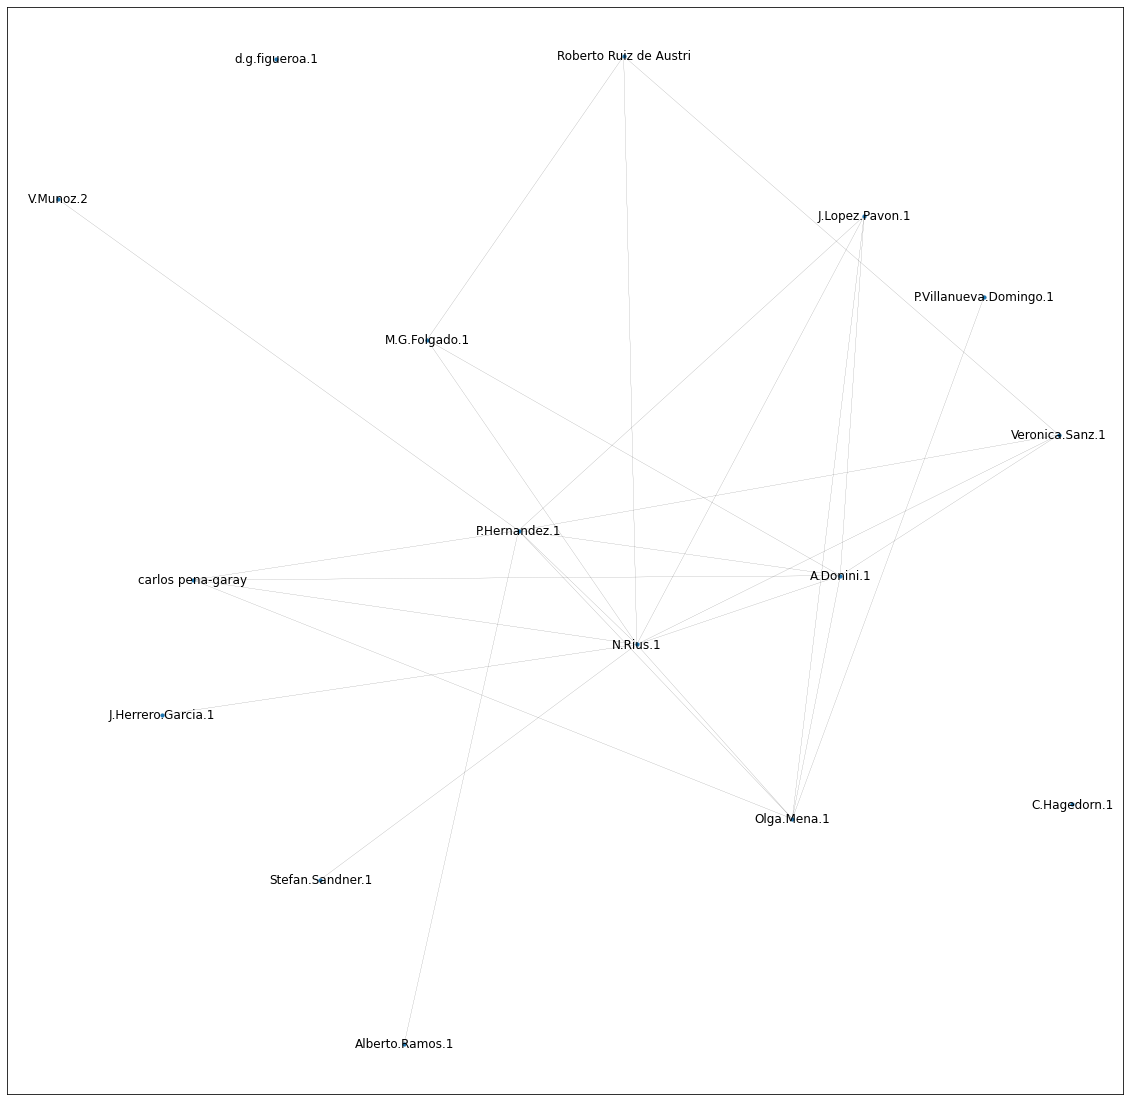

In [6]:
# Create a initial list of authors with the SOM group from the IFIC (http://som.ific.uv.es/)
ini_coauths = ini_coauths+["Olga.Mena.1", "P.Hernandez.1", "Veronica.Sanz.1", "J.Lopez.Pavon.1", "A.Donini.1", "C.Hagedorn.1", "Alberto.Ramos.1", "d.g.figueroa.1", "Roberto Ruiz de Austri", "carlos pena-garay", "N.Rius.1", "J.Herrero.Garcia.1"]

# Create their collaboration graph
graph, inigraph = create_coll_graph(ini_coauths)

# Plot only the initial graph (otherwise the plot is too busy)
plot_graph("SOMGraph", inigraph, k=1)

0 Albert.Einstein.1
INSPIRE-00000020 Einstein, Albert
B.Kaufman.2 Kaufman, B.
E.G.Straus.2 Straus, E.G.
E.Strauss.1 Strauss, E.G.
W.Pauli.1 Pauli, W.
V.Bargmann.1 Bargmann, V.
P.G.Bergmann.1 Bergmann, P.G.
L.Infeld.1 Infeld, L.
B.Hoffmann.2 Hoffmann, B.
N.Rosen.2 Rosen, N.
B.Podolsky.1 Podolsky, Boris
W.de.Sitter.1 de Sitter, W.
R.C.Tolman.1 Tolman, Richard C.
A.Gangui.1 Gangui, Alejandro
E.L.Ortiz.1 Ortiz, Eduardo L.
A.D.Fokker.1 Fokker, Adriaan D.
O.Stern.1 Stern, Otto
1 INSPIRE-00000020
2 B.Kaufman.2
L.Onsager.1 Onsager, Lars
3 E.G.Straus.2
4 E.Strauss.1
Problem reading json data
Number of nodes: 19 Number of edges: 23


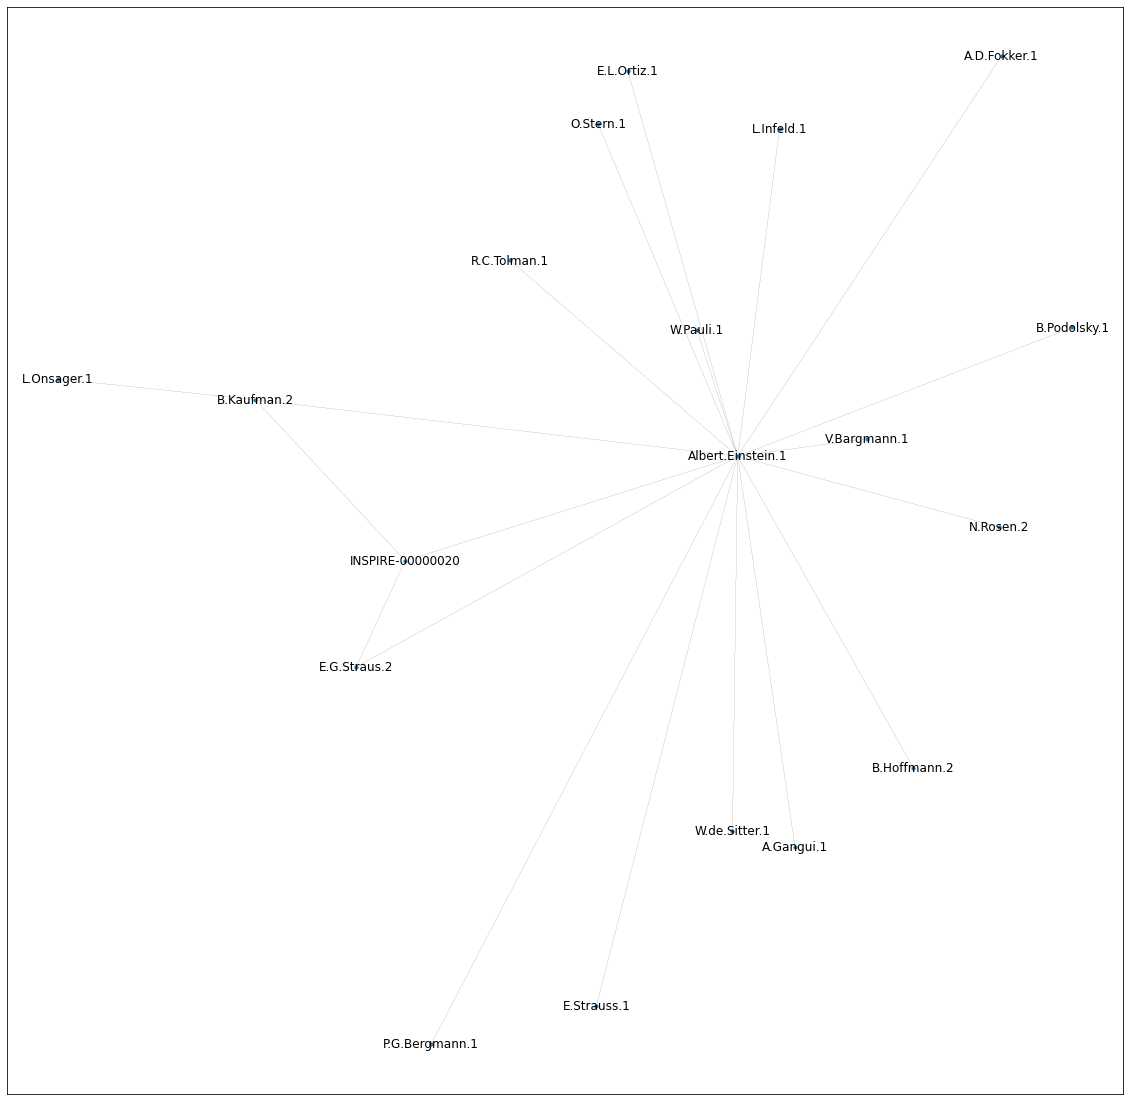

In [7]:
# Create the Einstein graph
ini_coauths = ["Albert.Einstein.1"]

# Create his collaboration graph up to 5 root authors
graph, inigraph = create_coll_graph(ini_coauths,5)

# Plot the graph
plot_graph("EinsteinGraph", graph, k=0.01)